<a href="https://colab.research.google.com/github/busung/data-analysis-by-EDA/blob/main/6_%EC%9D%B4%EB%94%94%EC%95%BC%EB%8A%94_%EC%8A%A4%EB%B2%85_%EC%98%86%EC%97%90_%EC%9E%88%EB%8A%94%EA%B0%80%3F(%EB%B6%80%EC%82%B0%EA%B8%B0%EC%A4%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#이디야는 정말 스타벅스 옆에 있는가?
* -> 옆이란?
* -> 스타벅스란?
* -> 이디야란?

#한글폰터 설치

In [2]:
!sudo apt install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,339 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and d

#라이브러리 불러오기

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if "Nanum" in f]

fm._rebuild()

# plt.style.use("seaborn-whitegrid")

path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc("font", family=font_name)
plt.rc("axes", unicode_minus=False)

#데이터 불러오기

In [4]:
!gdown --id 1Ip0BnNBhamH3tmJn-lBxfJMopiYna7UZ

Downloading...
From: https://drive.google.com/uc?id=1Ip0BnNBhamH3tmJn-lBxfJMopiYna7UZ
To: /content/store_infomation_20210331.zip
268MB [00:09, 29.5MB/s]


In [5]:
!unzip -qq -o store_infomation_20210331

In [6]:
shop_2021 = pd.read_csv("소상공인시장진흥공단_상가(상권)정보_부산_202103.csv")
shop_2021.shape

(136657, 39)

In [7]:
shop_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136657 entries, 0 to 136656
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     136657 non-null  int64  
 1   상호명        136656 non-null  object 
 2   지점명        18967 non-null   object 
 3   상권업종대분류코드  136657 non-null  object 
 4   상권업종대분류명   136657 non-null  object 
 5   상권업종중분류코드  136657 non-null  object 
 6   상권업종중분류명   136657 non-null  object 
 7   상권업종소분류코드  136657 non-null  object 
 8   상권업종소분류명   136657 non-null  object 
 9   표준산업분류코드   128352 non-null  object 
 10  표준산업분류명    128352 non-null  object 
 11  시도코드       136657 non-null  int64  
 12  시도명        136657 non-null  object 
 13  시군구코드      136657 non-null  int64  
 14  시군구명       136657 non-null  object 
 15  행정동코드      136657 non-null  int64  
 16  행정동명       136657 non-null  object 
 17  법정동코드      136657 non-null  int64  
 18  법정동명       136657 non-null  object 
 19  지번코드       136657 non-n

In [8]:
shop_2021.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17174094,도란도란,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,26,부산광역시,26230,부산진구,2623074000,개금1동,2623011100,개금동,2623011100201740004,1,대지,174,4.0,부산광역시 부산진구 개금동 174-4,262304187020,부산광역시 부산진구 가야대로482번길,29,3.0,2623011100101740004050547,NaN,부산광역시 부산진구 가야대로482번길 29-3,614813,47327.0,NaN,NaN,NaN,129.024938,35.151645
1,23206623,미광장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,여관업,26,부산광역시,26110,중구,2611056000,부평동,2611012600,부평동4가,2611012600200250001,1,대지,25,1.0,부산광역시 중구 부평동4가 25-1,261104175163,부산광역시 중구 보수대로44번길,5,NaN,2611012600100250001004473,NaN,부산광역시 중구 보수대로44번길 5,600074,48974.0,NaN,NaN,NaN,129.023668,35.100979
2,20418637,BHC치킨,동래점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,치킨 전문점,26,부산광역시,26260,동래구,2626052000,복산동,2626010500,복천동,2626010500201850000,1,대지,185,NaN,부산광역시 동래구 복천동 185,262604190058,부산광역시 동래구 동래로147번길,18,NaN,2626010500101850000016529,NaN,부산광역시 동래구 동래로147번길 18,607020,47802.0,NaN,NaN,NaN,129.087156,35.205267
3,24659633,스텔라,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,셔츠 및 기타 의복 소매업,26,부산광역시,26500,수영구,2650067000,남천2동,2650010500,남천동,2650010500201480004,1,대지,148,4.0,부산광역시 수영구 남천동 148-4,265003138005,부산광역시 수영구 광안해변로,100,NaN,2650010500101480004001694,비치아파트,부산광역시 수영구 광안해변로 100,613751,48305.0,NaN,NaN,20,129.115397,35.143770
4,17175332,정성밥상,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,26,부산광역시,26350,해운대구,2635051000,우1동,2635010500,우동,2635010500205520002,1,대지,552,2.0,부산광역시 해운대구 우동 552-2,263502006010,부산광역시 해운대구 해운대로,635,7.0,2635010500105520002023290,NaN,부산광역시 해운대구 해운대로 635-7,612819,48087.0,NaN,NaN,NaN,129.159641,35.164474


In [9]:
coffee=shop_2021[shop_2021["상권업종소분류명"].str.contains("커피")]
coffee.shape

(5960, 39)

#데이터분석

In [10]:
coffee.loc[coffee['상호명'].str.contains("스타벅스|이디야"),"상호명"].unique()#unique는 중복되지 않게 값을 반환해줌
#여기선 스타벅스,이디야만 검색했지만 STARBUCKS,ediya 같이 영문으로 된 곳도 있을 수 있음
#이를 shop_2021데이터에서 꼭 검색해서 데이터가 잘 뽑혀져나왔는지 확인 해야함

array(['이디야커피', '스타벅스', '스타벅스서면NC점', '이디야커피수영현대점', '스타벅스사직구장점',
       '스타벅스부산초량점', '스타벅스센텀그린타워점', '스타벅스명지오션시티점', '이디야커피보수점', '이디야커피숍',
       '스타벅스센텀KNN점', 'PPANGJIP(스타벅스재능기부카페2호점)', '스타벅스해운대점',
       '스타벅스동의대역점동의대역점', '스타벅스부산재송DT점', '이디야커피부산연산대로점', '스타벅스을숙도강변DT점',
       '이디야커피부산괴정대로점', '이디야커피경마공원점', '스타벅스부산프리미엄점', '이디야커피부산자갈치역점',
       '이디야커피부산금강로점', '스타벅스광안비치점', '이디야커피전문점', '스타벅스연산시티타워점',
       '스타벅스동명대DT점', '스타벅스금정이마트점', '스타벅스동부산DT', '이디야커피서부산유통지구점',
       '스타벅스부산재송DT', '스타벅스국제시장점', '스타벅스부산서면', '이디야커피국제물류점', '이디야커피유엔공원점',
       '스타벅스부산교대역점', '스타벅스자갈치역점', '이디야커피명지초교점', '이디야커피신창', '스타벅스센텀신세계B1',
       '스타벅스서면센트럴스퀘어점', '스타벅스서면중앙점', '이디야거제홈타운'], dtype=object)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.

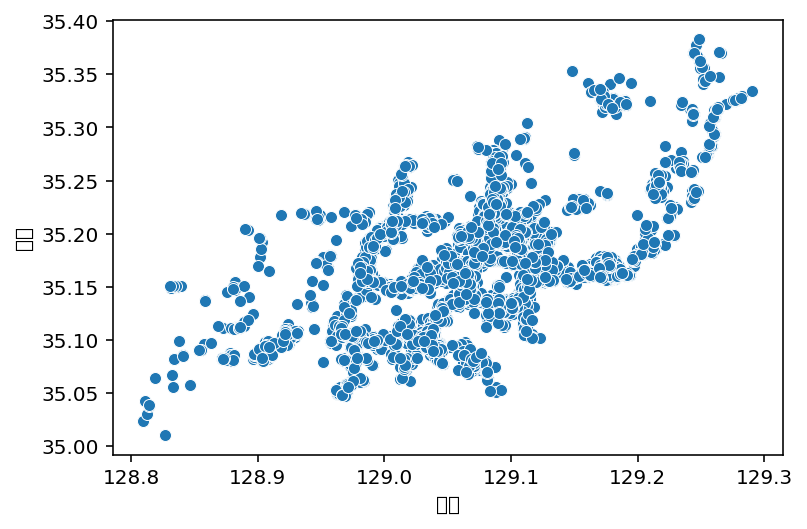

In [11]:
sns.scatterplot(x=coffee['경도'],y=coffee['위도'])

In [12]:
df_cafe=shop_2021.loc[shop_2021["상호명"].str.contains("스타벅스|이디야|ediya|STARBUCKS",na=False)]
df_cafe.shape

(249, 39)

In [13]:
df_cafe.loc[df_cafe["상호명"].str.contains("스타벅스|STARBUCKS"),'브랜드명']='스타벅스'
df_cafe.loc[df_cafe["상호명"].str.contains("이디야|ediya"),'브랜드명']='이디야'
df_cafe.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,브랜드명
362,23361399,이디야커피,반송도서관점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,26,부산광역시,26350,해운대구,2635061000,반송1동,2635010100,반송동,2635010100202570407,1,대지,257,407.0,부산광역시 해운대구 반송동 257-407,263503133028,부산광역시 해운대구 아랫반송로,25,NaN,2635010100102570408008114,샬롬안경,부산광역시 해운대구 아랫반송로 25,612080,48017.0,NaN,NaN,NaN,129.148858,35.225032,이디야
827,20049835,이디야커피,부산다대포점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,26,부산광역시,26380,사하구,2638060100,다대1동,2638010600,다대동,2638010600215520012,1,대지,1552,12.0,부산광역시 사하구 다대동 1552-12,263803134007,부산광역시 사하구 다대로,682,NaN,2638010600115520012000001,NaN,부산광역시 사하구 다대로 682,604050,49506.0,NaN,1,NaN,128.966690,35.048200,이디야
1144,23481341,이디야커피,부산초량역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,26,부산광역시,26170,동구,2617053000,초량3동,2617010100,초량동,2617053000211650011,1,대지,1165,11.0,부산광역시 동구 초량동 1165-11,261704181427,부산광역시 동구 중앙대로274번길,7,3.0,2617010100111650011000001,부산역유림줄리엣,부산광역시 동구 중앙대로274번길 7-3,601010,48731.0,1,NaN,NaN,129.043920,35.121133,이디야
2925,20514870,스타벅스,부산역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,26,부산광역시,26170,동구,2617053000,초량3동,2617010100,초량동,2617010100211990009,1,대지,1199,9.0,부산광역시 동구 초량동 1199-9,261702000010,부산광역시 동구 중앙대로,216,NaN,2617010100111990009003560,NaN,부산광역시 동구 중앙대로 216,601010,48733.0,NaN,1,NaN,129.040831,35.116346,스타벅스
5879,23519928,스타벅스,부산연산역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,26,부산광역시,26470,연제구,2647068000,연산4동,2647010200,연산동,2647010200206030010,1,대지,603,10.0,부산광역시 연제구 연산동 603-10,264703130026,부산광역시 연제구 반송로,20,NaN,2647010200106030010015746,동주빌딩,부산광역시 연제구 반송로 20,611080,47549.0,NaN,1,NaN,129.083344,35.186967,스타벅스


#시각화

In [14]:
geo_df = df_cafe.copy()

map = folium.Map(location=[geo_df["위도"].mean(), geo_df["경도"].mean()], zoom_start=12)

for n in geo_df.index:
    popup_name = geo_df["브랜드명"][n] + " - " + geo_df["도로명주소"][n]
    if geo_df["브랜드명"][n] == "스타벅스":
        icon_color = "green"
    else:
        icon_color = "blue"   
    
    folium.Marker([geo_df["위도"][n], geo_df["경도"][n]], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)
map

In [15]:
#구, 브랜드, 매장수
pd.DataFrame(df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count())

상호명
시군구명 브랜드명     
강서구  스타벅스    3
     이디야     8
금정구  스타벅스    7
     이디야     9
기장군  스타벅스    5
     이디야     5
남구   스타벅스    5
     이디야    13
동구   스타벅스    5
     이디야     3
동래구  스타벅스    5
     이디야    14
부산진구 스타벅스   19
     이디야    17
북구   스타벅스    2
     이디야    11
사상구  스타벅스    3
     이디야     4
사하구  스타벅스    8
     이디야    10
서구   스타벅스    2
     이디야     3
수영구  스타벅스    6
     이디야     5
연제구  스타벅스    6
     이디야    10
영도구  스타벅스    1
     이디야     2
중구   스타벅스    8
     이디야     7
해운대구 스타벅스   33
     이디야    10

In [16]:
df_cafe_count=pd.DataFrame(df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()).reset_index()
# df_cafe_count.rename(columns={'시군구명':'구'})#특정 열을 rename할 때
df_cafe_count.columns=['구','브랜드명','매장수']
df_cafe_count

,구,브랜드명,매장수
0,강서구,스타벅스,3
1,강서구,이디야,8
2,금정구,스타벅스,7
3,금정구,이디야,9
4,기장군,스타벅스,5
5,기장군,이디야,5
6,남구,스타벅스,5
7,남구,이디야,13
8,동구,스타벅스,5
9,동구,이디야,3


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_

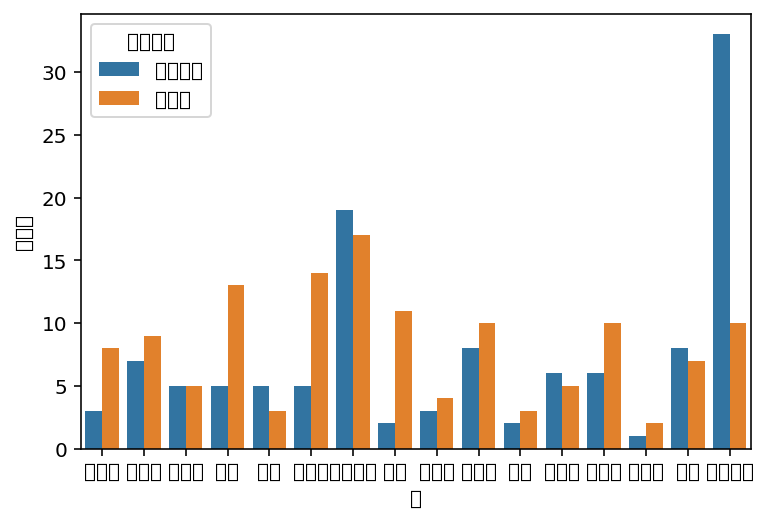

In [17]:
sns.barplot(data=df_cafe_count,x='구',y='매장수',hue='브랜드명')

In [18]:
# 부산시 geojson
!gdown --id 1j6mN82IZlPVJ9-8c08R9SYfFg-If9kTa

Downloading...
From: https://drive.google.com/uc?id=1j6mN82IZlPVJ9-8c08R9SYfFg-If9kTa
To: /content/busan_geojson.json
100% 26.2k/26.2k [00:00<00:00, 830kB/s]


In [19]:
import json
geo_path = "busan_geojson.json"
geo_json = json.load(open(geo_path, encoding="utf-8"))

In [20]:
# 카토그램에 사용될 데이터
df_cafe_gu = pd.DataFrame(df_cafe.groupby(["시군구명"])["브랜드명"].count())
df_cafe_gu.head()

,브랜드명
시군구명,
강서구,11
금정구,16
기장군,10
남구,18
동구,8


In [21]:
geo_df = df_cafe.copy()

map = folium.Map(location=[geo_df["위도"].mean(), geo_df["경도"].mean()], 
                 zoom_start=11)

map.choropleth(geo_data = geo_json,
               data = df_cafe_gu["브랜드명"],
               columns = [df_cafe_gu.index, df_cafe_gu["브랜드명"]],
               fill_color = "Purples",
               key_on = "feature.properties.name",
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)

for n in geo_df.index:
    popup_name = geo_df.loc[n, "상호명"]
    if geo_df.loc[n, "브랜드명"] == "스타벅스" :
        icon_color = "green"
    else:
        icon_color = "blue"    
    
    folium.CircleMarker(
        location=[geo_df.loc[n,"위도"], geo_df.loc[n, "경도"]],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [22]:
df_cafe_pivot = df_cafe_count.pivot_table(index=['구'],columns=['브랜드명'],values=['매장수'])
df_cafe_pivot.columns=['스타벅스','이디야']
df_cafe_pivot

,스타벅스,이디야
구,,
강서구,3,8
금정구,7,9
기장군,5,5
남구,5,13
동구,5,3
동래구,5,14
부산진구,19,17
북구,2,11
사상구,3,4


In [23]:
df_cafe_pivot['매장수비교'] = df_cafe_pivot.apply(lambda x:1 if x['스타벅스']>x['이디야'] else 0, axis=1)
df_cafe_pivot.head()

,스타벅스,이디야,매장수비교
구,,,
강서구,3,8,0
금정구,7,9,0
기장군,5,5,0
남구,5,13,0
동구,5,3,1


In [24]:
data = []
for i in df_cafe_pivot.index:
  if df_cafe_pivot.loc[i,'스타벅스'] > df_cafe_pivot.loc[i,'이디야']:
    data.append(1)
  else:
    data.append(0)
df_cafe_pivot['내가 만든 비교'] = data
df_cafe_pivot

,스타벅스,이디야,매장수비교,내가 만든 비교
구,,,,
강서구,3,8,0,0
금정구,7,9,0,0
기장군,5,5,0,0
남구,5,13,0,0
동구,5,3,1,1
동래구,5,14,0,0
부산진구,19,17,1,1
북구,2,11,0,0
사상구,3,4,0,0


In [26]:
lng_list=[]
lat_list=[]

for gu in df_cafe_pivot.index:
  lat = df_cafe.loc[df_cafe['시군구명']==gu,'위도'].mean()
  lat_list.append(lat)
  lng = df_cafe.loc[df_cafe['시군구명']==gu,'경도'].mean()
  lng_list.append(lng)

df_cafe_pivot['위도']=lat_list
df_cafe_pivot['경도']=lng_list
df_cafe_pivot
df_cafe_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 강서구 to 해운대구
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   스타벅스      16 non-null     int64  
 1   이디야       16 non-null     int64  
 2   매장수비교     16 non-null     int64  
 3   내가 만든 비교  16 non-null     int64  
 4   위도        16 non-null     float64
 5   경도        16 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 1.5+ KB


In [27]:
df_cafe_pivot["스타벅스"] = df_cafe_pivot["스타벅스"].astype(float)
df_cafe_pivot["이디야"] = df_cafe_pivot["이디야"].astype(float)
df_cafe_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 강서구 to 해운대구
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   스타벅스      16 non-null     float64
 1   이디야       16 non-null     float64
 2   매장수비교     16 non-null     int64  
 3   내가 만든 비교  16 non-null     int64  
 4   위도        16 non-null     float64
 5   경도        16 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.5+ KB


In [28]:
geo_df = df_cafe.copy()

# 지도를 명확하게 표현하기 위해서 tiles="Stamen Toner"로 변경하였습니다.
map = folium.Map(location=[geo_df["위도"].mean(), geo_df["경도"].mean()], zoom_start=13, tiles="Stamen Toner")

map.choropleth(geo_data = geo_json,
               data = df_cafe_pivot["매장수비교"],
               columns = [df_cafe_pivot.index, df_cafe_pivot["매장수비교"]],
               fill_color = "Purples",
               key_on = "feature.properties.name",
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)

# 녹화PC의 성능이 안 좋아서 버퍼링 때문에 27분 14초 부근에 아래 코드를 설명하는 부분이 누락되었습니다.
# df_cafe_pivot의 인덱스가 [0,1,2,3]이 아니라 ['강서구', '금정구'] 형태로 되어있어서 반복문을 수정하였습니다.
# 스타벅스와 이디야만 데이터에서 추출하면 되기 때문에 내부에 for를 ["스타벅스", "이디야"]로 한정하였습니다.
# 나머지는 기존 코드와 유사합니다.

for gu in df_cafe_pivot.index:
  for cafe in ["스타벅스", "이디야"]:
    cafe_count = df_cafe_pivot.loc[gu, cafe]
    msg = f"{gu} {cafe} 매장수 : {cafe_count:.0f}"        
    if cafe == "스타벅스": 
      icon_color = "green"
    else:
      icon_color = "blue"

    folium.CircleMarker(
      location = [df_cafe_pivot.loc[gu,"위도"], df_cafe_pivot.loc[gu, "경도"]],
      radius = cafe_count,
      color = icon_color,
      popup = msg,
      fill = True,
      fill_color = icon_color
    ).add_to(map)

map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
